In [1]:
# 릿지모델은 L2 규제를 활용한 선형 회귀 모델임

In [26]:
from sklearn.linear_model import Ridge
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
from sklearn.metrics import mean_absolute_error, mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
my_predictions = {}

colors = ['r', 'c', 'm', 'y', 'orchid', 'sandybrown', 'greenyellow', 'dodgerblue', 'deepskyblue',
'deeppink', 'crimson', 'salmon', 'rosybrown',' firebrick', 'forestgreen', 'royalblue', 'indigo', 'navy', 'mediumpurple', 'chocolate', 'gold', 'seagreen', 'turquoise', 'steelblue', 'slategray', 'peru',
'midhighblue', 'slateblue', 'dimgray', 'cadetblue', 'tomato']

In [31]:
def plot_predictions(name_, pred, actual):
    df = pd.DataFrame({'prediction': pred, 'actual': y_test})
    df = df.sort_values(by='actual').reset_index(drop=True)

    plt.figure(figsize=(12, 9))
    plt.scatter(df.index, df['prediction'], marker='x', color='r')
    plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
    plt.title(name_, fontsize=15)
    plt.legend(['prediction', 'actual'], fontsize=12) # 이게 좌상단 나타내는 라벨 
    plt.show()

In [32]:
def mse_eval(name_, pred, actual):
    global my_predictions
    global colors

    plot_predictions(name_, pred, actual)

    mse = mean_squared_error(pred, actual)

    print(mse)

    my_predictions[name_] = mse

    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)

    df = pd.DataFrame(y_value, columns=['model', 'mse'])
    print(df)
    min_ = df['mse'].min() - 10
    max_ = df['mse'].max() + 10

    length = len(df)

    plt.figure(figsize=(10, length))

    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=15)
    bars = ax.barh(np.arange(len(df)), df['mse'])

    for i, v in enumerate(df['mse']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=15, fontweight='bold')

    plt.title('MSE Error', fontsize=18)
    plt.xlim(min_, max_)

    plt.show()

In [33]:
data = load_boston()

df = pd.DataFrame(data['data'], columns=data['feature_names'])

df['MEDV'] = data['target'] # 주택의 중앙값

# 이전에 사용했던 데이터들
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df.drop('MEDV', 1), df['MEDV']) # X 데이터와 Y데이터 삽입

In [11]:
# 값이 커질 수록 큰 규제
alphas = [100, 10, 1, 0, 1, 0.01, 0.001, 0.0001]

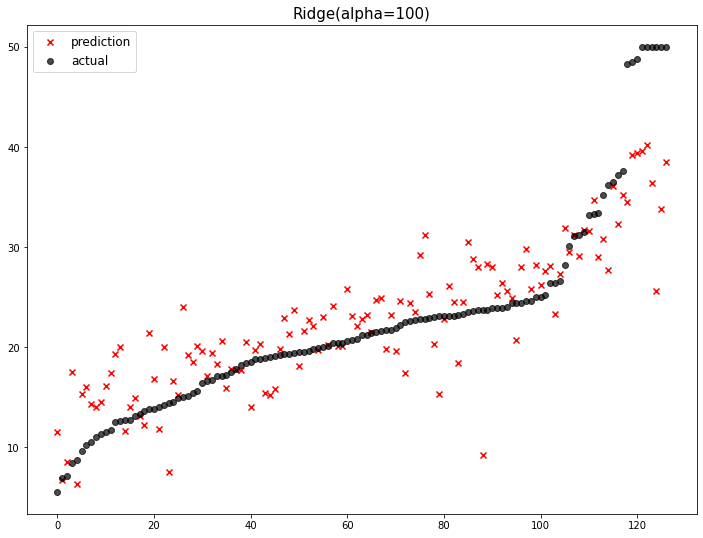

27.809477367687013
              model        mse
0  Ridge(alpha=100)  27.809477


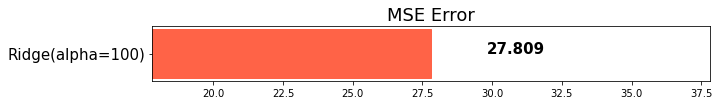

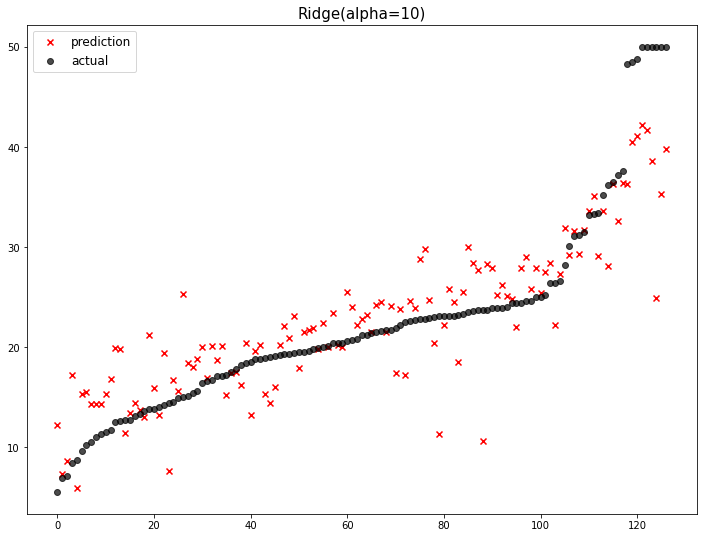

25.256210383457432
              model        mse
0  Ridge(alpha=100)  27.809477
1   Ridge(alpha=10)  25.256210


ValueError: Invalid RGBA argument: 'midhighblue'

In [34]:
for alpha in alphas:
    ridge = Ridge(alpha = alpha)
    ridge.fit(x_train, y_train)
    pred = ridge.predict(x_test)
    mse_eval('Ridge(alpha={})'.format(alpha), pred, y_test)

In [35]:
x_train.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [37]:
ridge.coef_ # 컬럼과 매핑되어서 결과가 나옴

array([-0.1077199 ,  0.04411028, -0.03949411,  1.62008842, -1.85748579,
        3.34316891, -0.01275634, -1.19997773,  0.29104406, -0.01247668,
       -0.83040039,  0.01130682, -0.57426089])

In [39]:
def plot_coef(columns, coef):
    coef_df = pd.DataFrame(list(zip(columns, coef)))
    coef_df.columns = ['feature', 'coef']
    coef_df = coef_df.sort_values('coef', ascending=False).reset_index(drop=True)

    fig, ax = plt.subplots(figsize=(9, 7))
    ax.barh(np.arange(len(coef_df)), coef_df['coef'])
    idx = np.arange(len(coef_df))
    ax.set_yticks(idx)
    ax.set_yticklabels(coef_df['feature'])
    fig.tight_layout()
    plt.show()

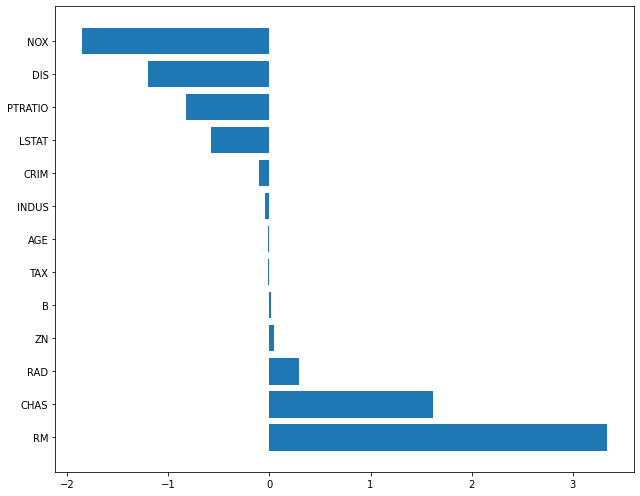

In [43]:
# 각 feature 별 coef 0은 미세한 영향만 미친다고 볼 수 있음
plot_coef(x_train.columns, ridge.coef_)

In [48]:
# 알파 자체가 규제값임
# 어떤 하이퍼파라미터 값을 주느냐에 따라 coef(weight값)이 다르게 나옴
# 실제 사례에 맞게 파라미터값을 조정해야함
ridge_100 = Ridge(alpha=100)
ridge_100.fit(x_train, y_train)
ridge_pred_100 = ridge_100.predict(x_test)

ridge_001 = Ridge(alpha=0.001)
ridge_001.fit(x_train, y_train)
ridge_pred_001 = ridge_001.predict(x_test)

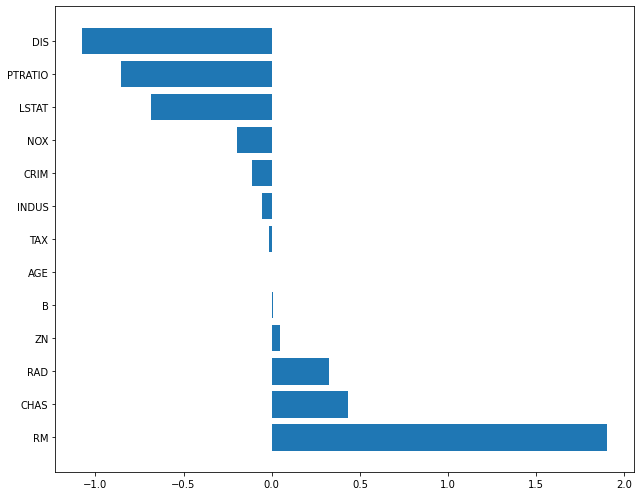

In [45]:
plot_coef(x_train.columns, ridge_100.coef_)

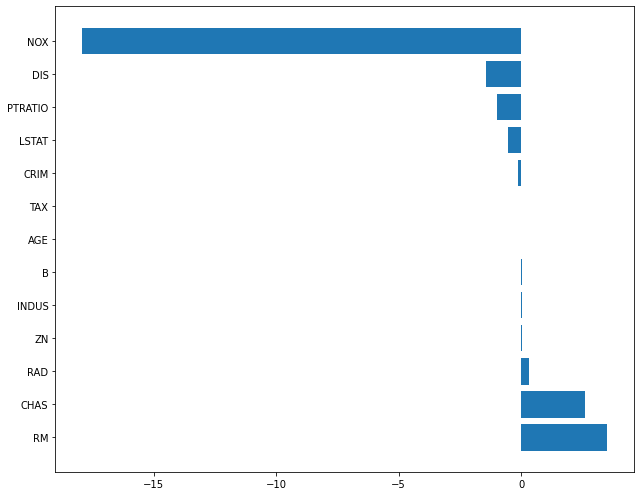

In [46]:
plot_coef(x_train.columns, ridge_001.coef_)